## The Trapezoid rule

The next polynomial degree is $1$; a line.

Given the points $x_i$, $x_{i+1}$, $f_i$, and $f_{i+1}$,


$$
f(x) = f_i + \frac{f_{i+1} - f_i}{x_{i+1} - x_i} (x - x_i)
$$

and integrating,

$$
\begin{align}
\int_{x_i}^{x_{i+1}} f(x) \, dx &= \int_{x_i}^{x_{i+1}} \left( f_i + \frac{f_{i+1} - f_i}{x_{i+1} - x_i} (x - x_i) \right) dx \\
 &= \frac{f_i + f_{i+1}}{2} (x_{i+1} - x_i) \\
 &= h \frac{f_i + f_{i+1}}{2}
\end{align}
$$

Graphically:


![Trapezoidal_rule_illustration.svg](./Trapezoidal_rule_illustration.svg)

#### Error

The accuracy is calculated from the Taylor series expansion of $f(x)$ around the midpoint $y_i = \frac{x_{i+1} + x_i}{2}$, which is the midpoint between $x_i$ and $x_{i+1}$.

Calculating the error is a little more complicated since we'll need the function value at the midpoint. Begin with the Taylor series at $x_i$ and $x_{i+1}$, noting that $x_i - y_i = -\frac{h}{2}$ and $x_{i+1} - y_i = \frac{h}{2}$:

$$
\begin{align}
f(x_i) &= f(y_i) - \frac{hf^{\prime}(y_i)}{2} + \frac{h^2f''(y_i)}{8} - \cdots \\
f(x_{i+1}) &= f(y_i) + \frac{hf^{\prime}(y_i)}{2} + \frac{h^2f''(y_i)}{8} + \cdots.
\end{align}
$$

Taking the average

$$\frac{f(x_{i+1})+f(x_i)}{2} = f(y_i) + O(h^2).$$

cancels odd derivatives, and we can now find,

$$f(y_i) = \frac{f(x_{i+1})+f(x_i)}{2} + O(h^2).$$


Now we take the Taylor series expanded about $y_i$ and integrate / distribute as before:

$$
\begin{align}
f(x) &= f(y_i) + f^{\prime}(y_i)(x - y_i) + \frac{f''(y_i)(x - y_i)^2}{2!} + \cdots \\
\int_{x_i}^{x_{i+1}} f(x) dx &= \int_{x_i}^{x_{i+1}} \left(f(y_i) + f^{\prime}(y_i)(x - y_i) + \frac{f''(y_i)(x - y_i)^2}{2!} + \cdots\right) dx \\
&= \int_{x_i}^{x_{i+1}} f(y_i) dx + \int_{x_i}^{x_{i+1}} f^{\prime}(y_i)(x - y_i)dx + \int_{x_i}^{x_{i+1}} \frac{f''(y_i)(x - y_i)^2}{2!} dx + \cdots
\end{align}
$$
Once again, since $x_i$ and $x_{i+1}$ are symmetric around $y_i$, odd integrals evaluate to zero. Now we can insert our result from above,

$$ \begin{align}
\int_{x_i}^{x_{i+1}} f(x) dx &= hf(y_i) + O(h^3) \\
& = h \left(\frac{f(x_{i+1})+f(x_i)}{2} + O(h^2)\right) + O(h^3) \\
&= h \left(\frac{f(x_{i+1})+f(x_i)}{2}\right) + hO(h^2) + O(h^3) \\
&= h \left(\frac{f(x_{i+1})+f(x_i)}{2}\right) + O(h^3)
\end{align}
$$

Therefore the trapezoid rule is is $O(h^3)$ over subintervals and totals $O(h^2)$ over the whole interval.

For the same function as the midpoint method (which approximated 2.033), the trapezoid method yields,

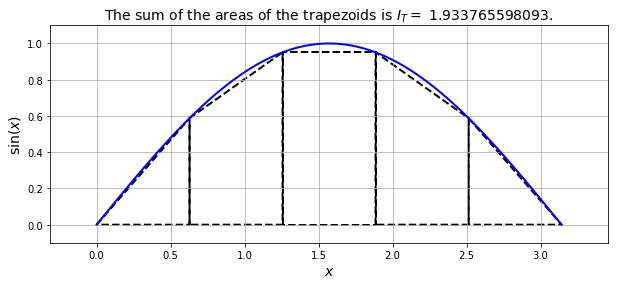

#### Example

Integrate $sin(x)$ from 0 to $\pi$ with the midpoint and trapezoid rules.

In [3]:
import numpy as np
import scipy as sp

def f(x):
  """The function to integrate."""
  return np.sin(x)

def trapezoid_method(f, a, b, n):
  """Approximates the integral of f from a to b using the trapezoid method."""
  h = (b - a) / n
  x = np.linspace(a, b, n + 1)
  integral = np.trapz(f(x), x, h)
  return integral

def midpoint_method(f, a, b, n):
  """Approximates the integral of f from a to b using the midpoint method."""
  h = (b - a) / n
  x = np.linspace(a + h / 2, b - h / 2, n)
  integral = h * np.sum(f(x))
  return integral

a = 0
b = np.pi
for n in [2,4,8,16,32]:
  trapezoid_result = trapezoid_method(f, a, b, n)
  midpoint_result = midpoint_method(f, a, b, n)
  simps_result = simps_method(f, a, b, n)
  print(f"n = {n}: Trapezoid error = {abs(trapezoid_result-2):.6f}, Midpoint error= {midpoint_result-2:.6f}")

n = 2: Trapezoid error = 0.429204, Midpoint error= 0.221441
n = 4: Trapezoid error = 0.103881, Midpoint error= 0.052344
n = 8: Trapezoid error = 0.025768, Midpoint error= 0.012909
n = 16: Trapezoid error = 0.006430, Midpoint error= 0.003216
n = 32: Trapezoid error = 0.001607, Midpoint error= 0.000803


C:\Users\wellandm\AppData\Local\Temp\ipykernel_20800\3530925064.py:12: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(f(x), x, h)


Notice we get quadratic convergence for both but that the midpoint method is actually more accurate! However, we had to evaluate the midpoint rule *at the midpoints* this is problematic if we just have tabulated data, whereas the trapezoid rule can be applied directly.